# **AI Machine Learning 특강**

![titanic](https://pbs.twimg.com/media/C-C5jcSXUAEtjNl?format=jpg&name=4096x4096)

ref: Richard Johnson https://twitter.com/newsillustrator

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from IPython.display import Image

In [2]:
df_train = pd.read_csv('train_titanic.csv')

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


survival:	0 = No, 1 = Yes
sibsp:	# of siblings / spouses aboard the Titanic	
parch:	# of parents / children aboard the Titanic	
embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

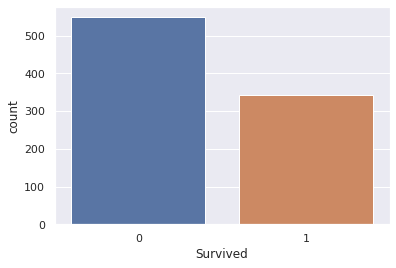

In [6]:
sns.countplot(x='Survived', data=df_train)

In [7]:
print(df_train.Survived.sum()/df_train.Survived.count())

0.3838383838383838


In [8]:
df_train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

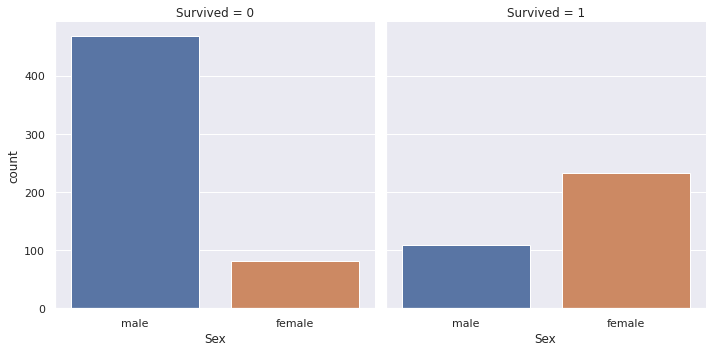

In [9]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df_train)

In [10]:
print("% of women survived: " , df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print("% of men survived:   " , df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

% of women survived:  0.7420382165605095
% of men survived:    0.18890814558058924


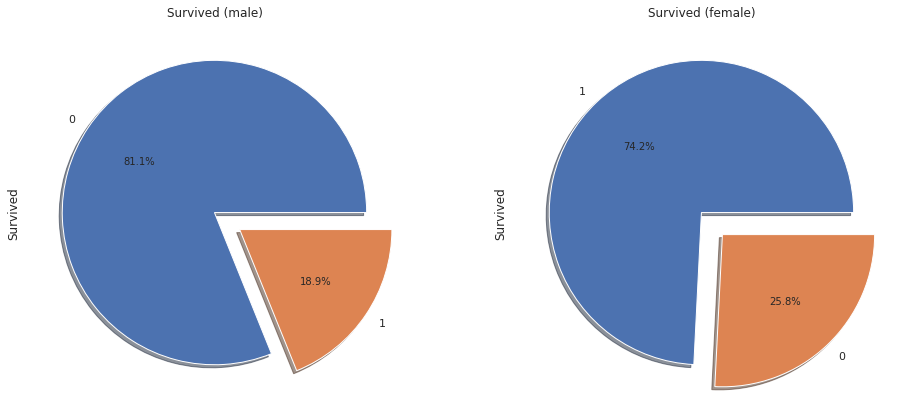

In [11]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df_train['Survived'][df_train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df_train['Survived'][df_train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

In [12]:
print("% of survivals in") 
print("Pclass=1 : ", df_train.Survived[df_train.Pclass == 1].sum()/df_train[df_train.Pclass == 1].Survived.count())
print("Pclass=2 : ", df_train.Survived[df_train.Pclass == 2].sum()/df_train[df_train.Pclass == 2].Survived.count())
print("Pclass=3 : ", df_train.Survived[df_train.Pclass == 3].sum()/df_train[df_train.Pclass == 3].Survived.count())

% of survivals in
Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


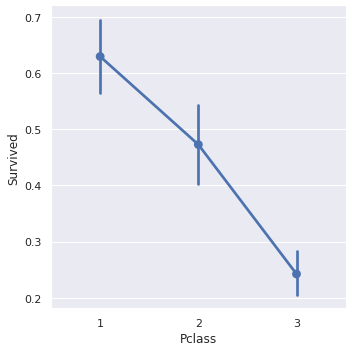

In [13]:
sns.catplot('Pclass','Survived', kind='point', data=df_train)

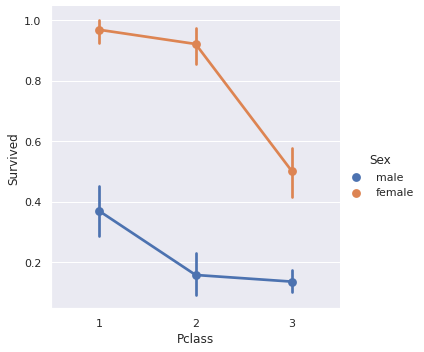

In [14]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data=df_train)

![titanic](https://cdn.britannica.com/68/185468-050-C0D53622/Titanic-iceberg-British-15-1912.jpg)

ref: Encyclopædia Britannica, Inc./Patrick O'Neill Riley https://www.britannica.com/topic/Titanic

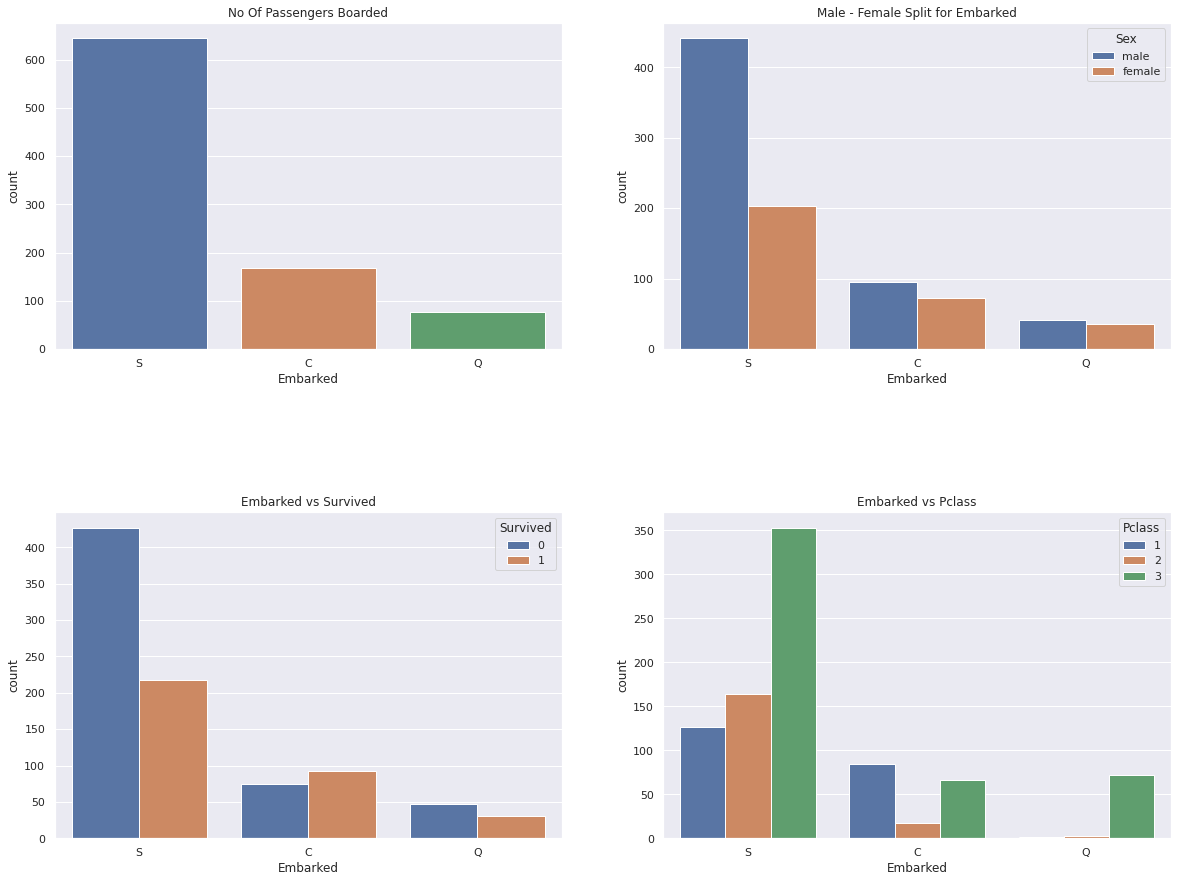

In [15]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('No Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('Male - Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue = 'Pclass', data = df_train, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace = 0.2, hspace=0.5)
plt.show()

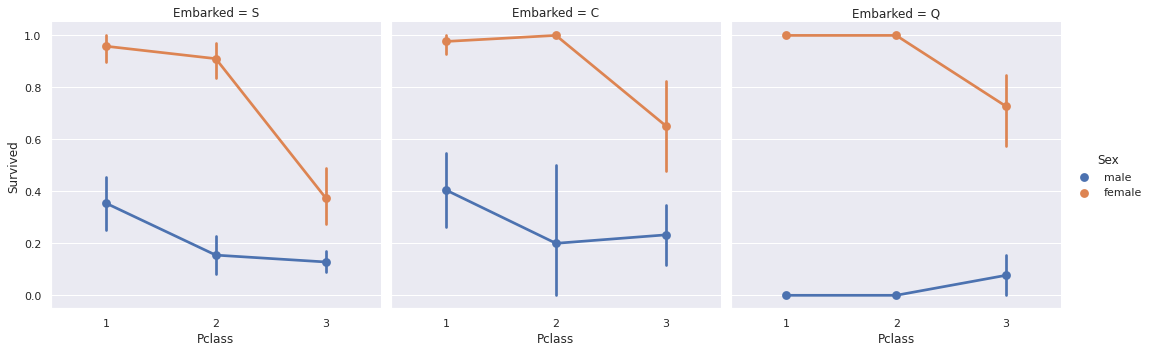

In [16]:
sns.catplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = df_train, kind="point")
plt.show()

In [17]:
df_train['Embarked'].fillna('S', inplace = True)

In [18]:
df_train['Embarked'].isnull().any()

False

In [19]:
print('Oldset Passenger was of:', df_train['Age'].max(), 'Years')
print('Youngest Passenger was of:', df_train['Age'].min(), 'Years')
print('Average Age on the ship:', df_train['Age'].mean(), 'Years')

Oldset Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


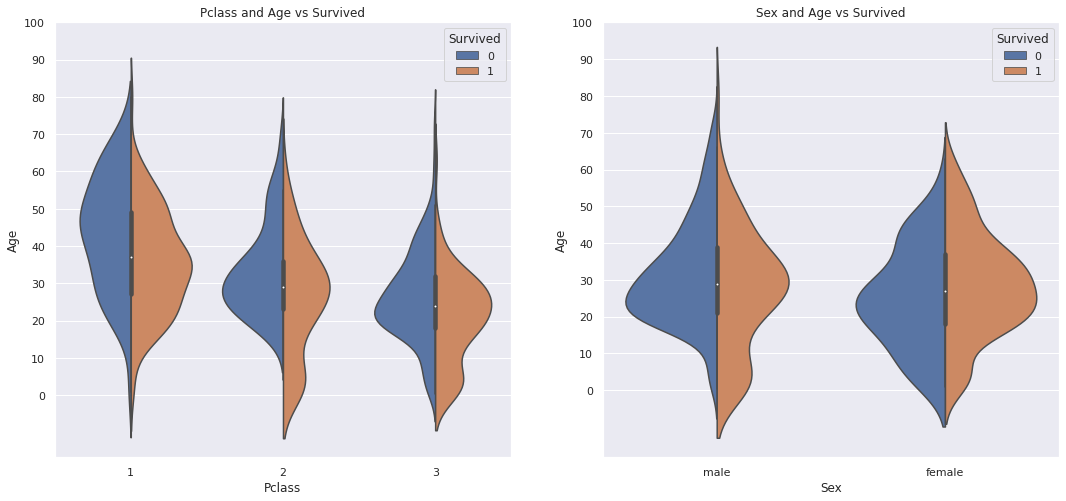

In [20]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived',
               data=df_train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [21]:
df_train['Age_band'] = 0
df_train.loc[df_train['Age'] <= 16, 'Age_band'] = 0
df_train.loc[(df_train['Age'] > 16) & (df_train['Age'] <=32), 'Age_band'] = 1
df_train.loc[(df_train['Age'] > 32) & (df_train['Age'] <=48), 'Age_band'] = 2
df_train.loc[(df_train['Age'] > 48) & (df_train['Age'] <=64), 'Age_band'] = 3
df_train.loc[df_train['Age'] >64, 'Age_band'] = 4
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [22]:
df_train['Age_band'].value_counts()

1    346
0    277
2    188
3     69
4     11
Name: Age_band, dtype: int64

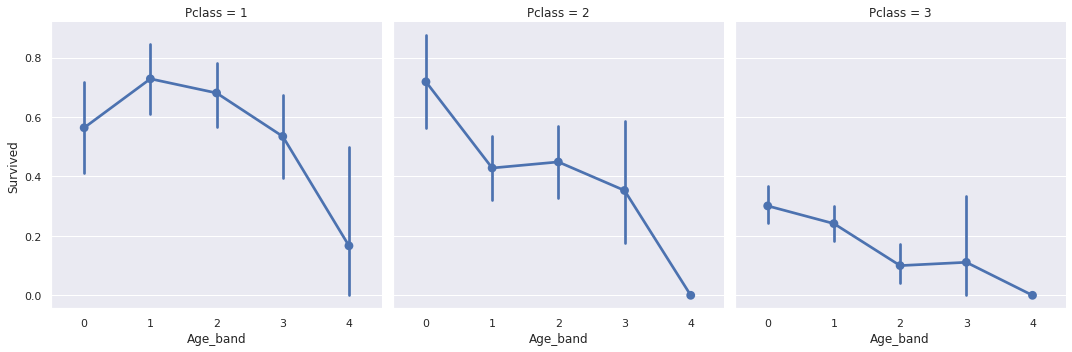

In [23]:
sns.catplot('Age_band', 'Survived', data = df_train, col = 'Pclass', kind="point")
plt.show()

In [24]:
df_train['Initial'] = 0
for i in df_train:
    df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_train['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [25]:
df_train['Initial'] = 0
for i in df_train:
    df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_train['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [26]:
pd.crosstab(df_train.Initial, df_train.Sex)

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [27]:
df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], [
                        'Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [28]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Age_band         0
Initial          0
dtype: int64

In [29]:
df_train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [30]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Other'), 'Age'] = 46

In [31]:
df_train.Age.isnull().any()

False

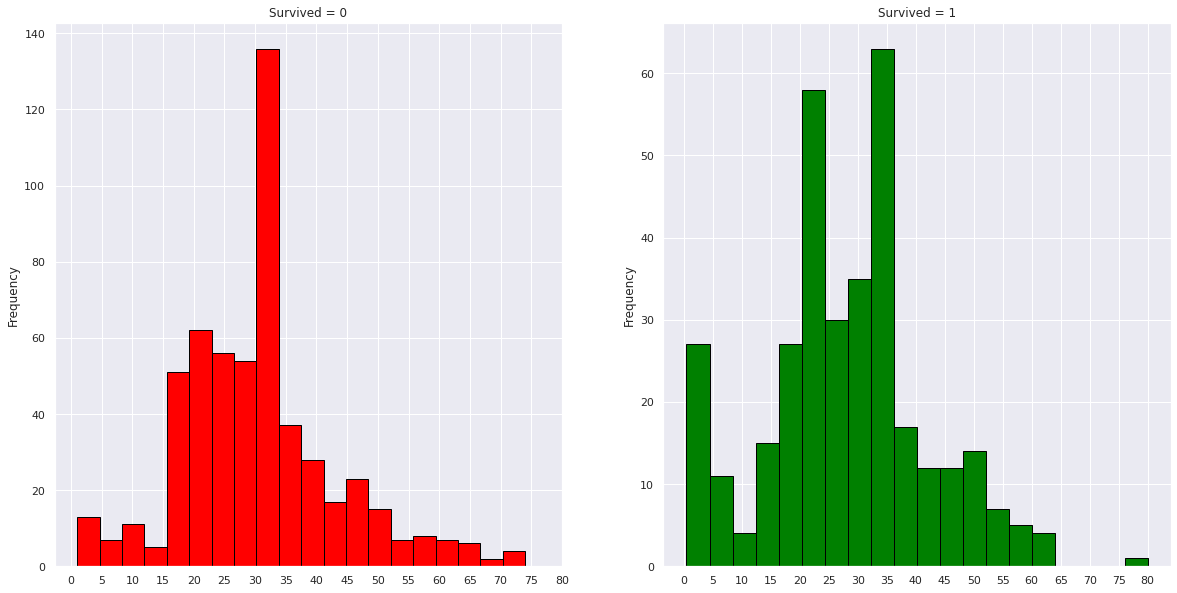

In [32]:
f, ax = plt.subplots(1,2,figsize = (20,10))
df_train[df_train.Survived == 0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'red')
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

df_train[df_train.Survived == 1].Age.plot.hist(ax = ax[1], color = 'green', bins = 20, edgecolor = 'black')
ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

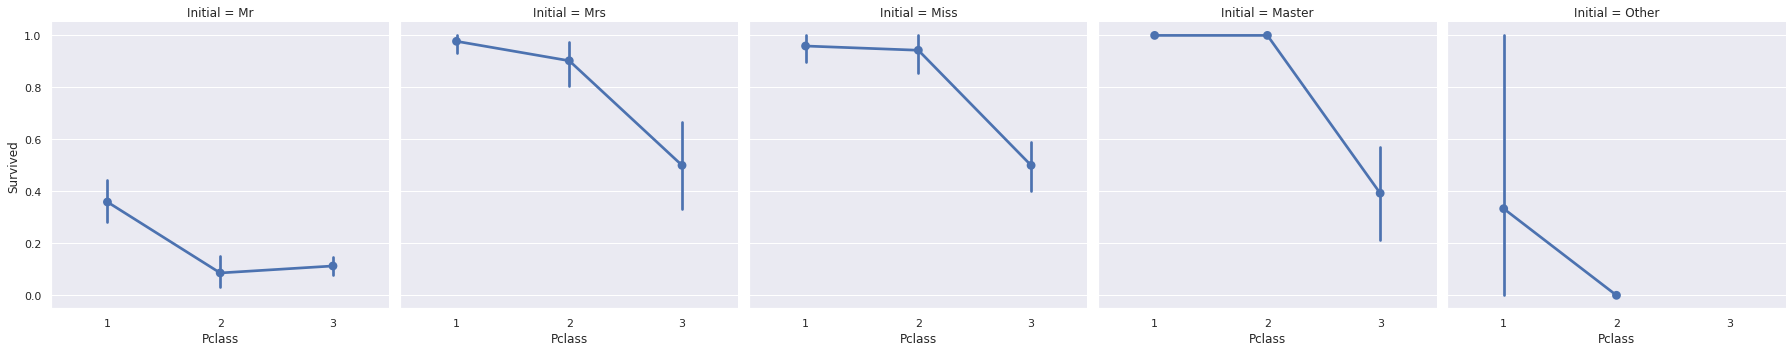

In [33]:
sns.catplot('Pclass', 'Survived', col = 'Initial', data = df_train, kind="point")
plt.show()

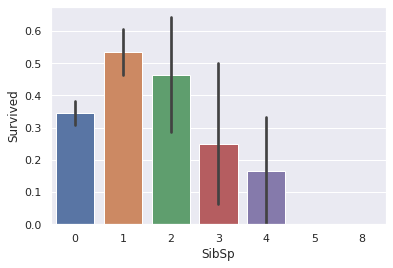

In [34]:
sns.barplot('SibSp', 'Survived', data=df_train)

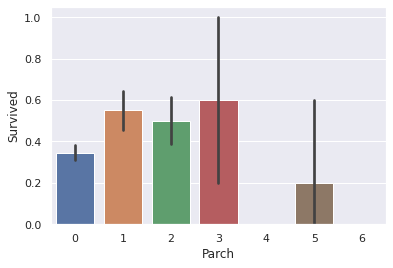

In [35]:
sns.barplot('Parch', 'Survived', data = df_train)

In [36]:
df_train['Family_Size'] = 0
df_train['Family_Size'] = df_train['Parch'] + df_train['SibSp']

df_train['Alone'] = 0
df_train.loc[df_train.Family_Size == 0 , 'Alone'] = 1

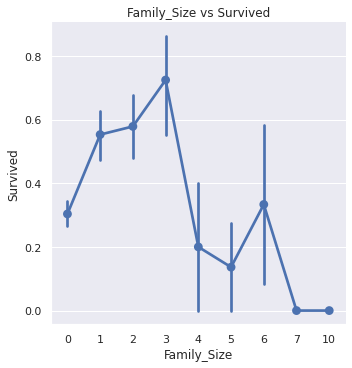

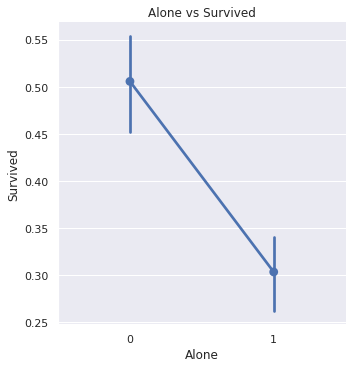

In [37]:
sns.catplot('Family_Size', 'Survived', data = df_train, kind="point")
plt.title('Family_Size vs Survived')

sns.catplot('Alone', 'Survived', data = df_train, kind="point")
plt.title('Alone vs Survived')

plt.show()

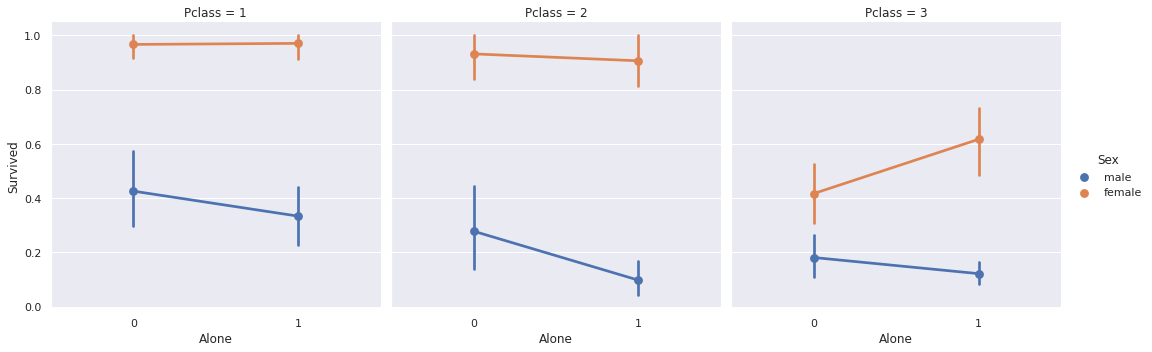

In [38]:
sns.catplot('Alone', 'Survived', data= df_train, hue = 'Sex', col = 'Pclass', kind="point")
plt.show()

In [39]:
print('Highest Fare was:', df_train['Fare'].max())
print('Lowest Fare was:', df_train['Fare'].min())
print('Average Fare was:', df_train['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


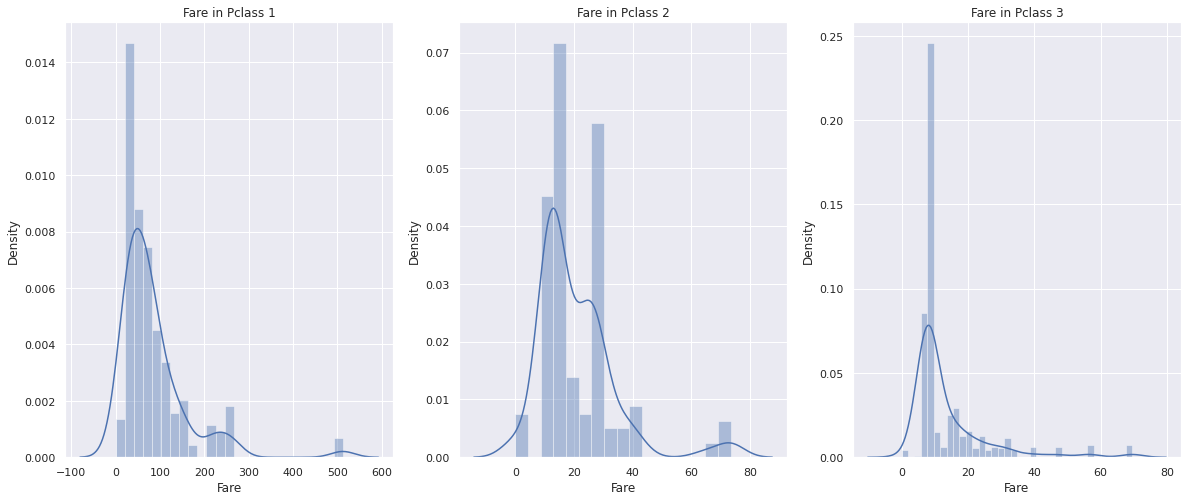

In [40]:
f, ax = plt.subplots(1,3, figsize = (20,8))
sns.distplot(df_train[df_train['Pclass'] == 1].Fare, ax = ax[0])
ax[0].set_title('Fare in Pclass 1')

sns.distplot(df_train[df_train['Pclass'] == 2].Fare, ax = ax[1])
ax[1].set_title('Fare in Pclass 2')

sns.distplot(df_train[df_train['Pclass'] == 3].Fare, ax = ax[2])
ax[2].set_title('Fare in Pclass 3')

plt.show()

In [41]:
df_train['Fare_Range'] = pd.qcut(df_train['Fare'], 4)
df_train.groupby(['Fare_Range'])['Survived'].mean()

Fare_Range
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

In [42]:
df_train['Fare_cat'] = 0
df_train.loc[df_train['Fare'] <= 7.91, 'Fare_cat'] = 0
df_train.loc[(df_train['Fare'] > 7.91) & (df_train['Fare'] <= 14.454), 'Fare_cat'] = 1
df_train.loc[(df_train['Fare'] > 14.454) & (df_train['Fare'] <= 31), 'Fare_cat'] = 2
df_train.loc[(df_train['Fare'] > 31) & (df_train['Fare'] <= 513), 'Fare_cat'] = 3

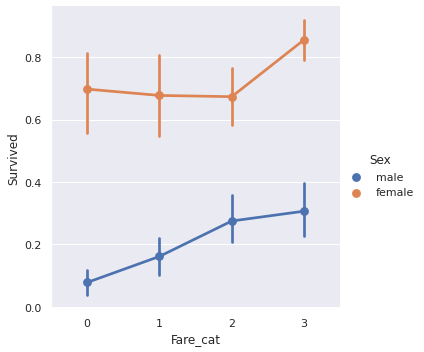

In [43]:
sns.catplot('Fare_cat','Survived', data = df_train, hue = 'Sex', kind="point")
plt.show()

In [44]:
df_train['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
df_train['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
df_train['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other', ], [
                        0, 1, 2, 3, 4], inplace=True)

In [45]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band,Initial,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,1,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,2,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,1,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,2,0,0,1,"(7.91, 14.454]",1


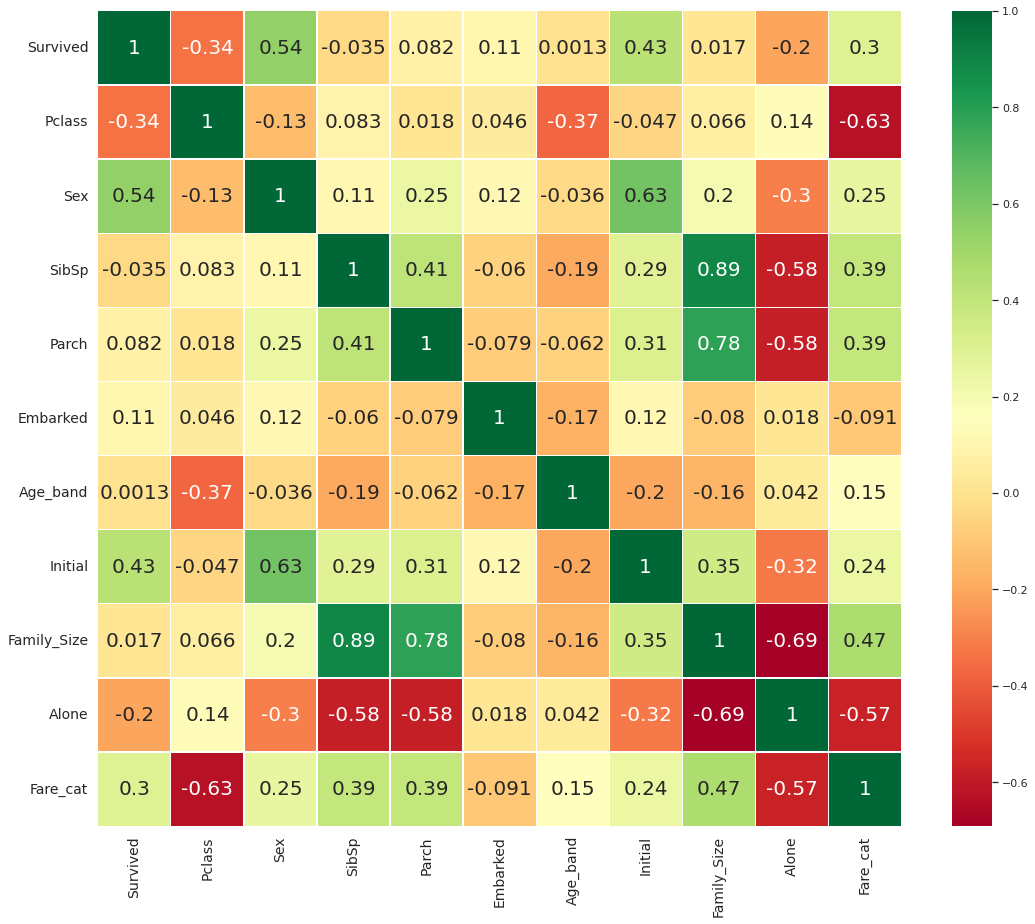

In [46]:
df_train.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis = 1, inplace = True)
sns.heatmap(df_train.corr(), annot = True, cmap = 'RdYlGn', linewidths= 0.2, annot_kws={'size': 20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import graphviz

In [48]:
train, test = train_test_split(
    df_train, test_size=0.3, random_state=0, stratify=df_train['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
train_Y = np.ravel(train_Y, order = 'C')
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
test_Y = np.ravel(test_Y, order = 'C')
X = df_train[df_train.columns[1:]]
Y = df_train['Survived']

In [49]:
model1=KNeighborsClassifier() 
model1.fit(train_X,train_Y)
prediction1=model1.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction1,test_Y))

The accuracy of the KNN is 0.8171641791044776


In [50]:
model1

KNeighborsClassifier()

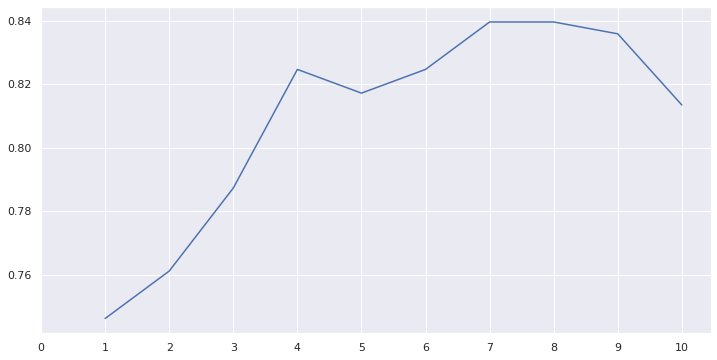

Accuracies for different values of n ar : [0.74626866 0.76119403 0.78731343 0.82462687 0.81716418 0.82462687
 0.83955224 0.83955224 0.8358209  0.81343284] with the max value as 0.8395522388059702


In [51]:
a_index = list(range(1, 11))
a = pd.Series(dtype='object')
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)), ignore_index=True)
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n ar :', a.values, 'with the max value as', a.values.max())

In [52]:
model2=KNeighborsClassifier(n_neighbors=7) 
model2.fit(train_X,train_Y)
prediction2=model2.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction2,test_Y))

The accuracy of the KNN is 0.8395522388059702


In [53]:
model3 = LogisticRegression()
model3.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


In [54]:
model4=DecisionTreeClassifier(max_depth=4)
model4.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8134328358208955


In [55]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_band',
       'Initial', 'Family_Size', 'Alone', 'Fare_cat'],
      dtype='object')

In [56]:
feature_names = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_band',
       'Initial', 'Family_Size', 'Alone', 'Fare_cat']
class_names = ['Dead', 'Survive']

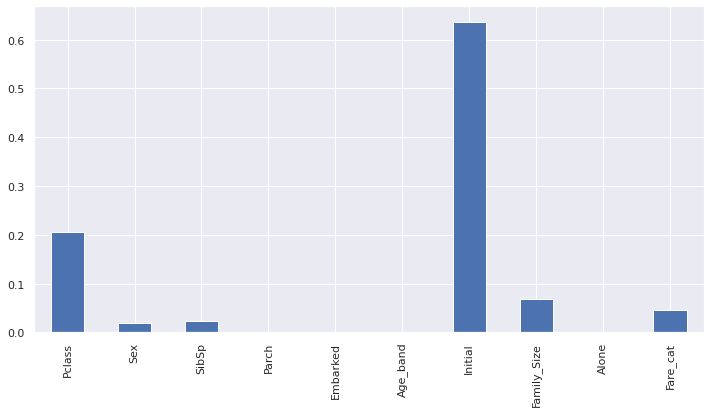

In [57]:
tree_importance = pd.Series(model4.feature_importances_, index=feature_names)

fig, ax = plt.subplots()
tree_importance.plot.bar(ax=ax)
fig.set_size_inches(12,6)
plt.show()

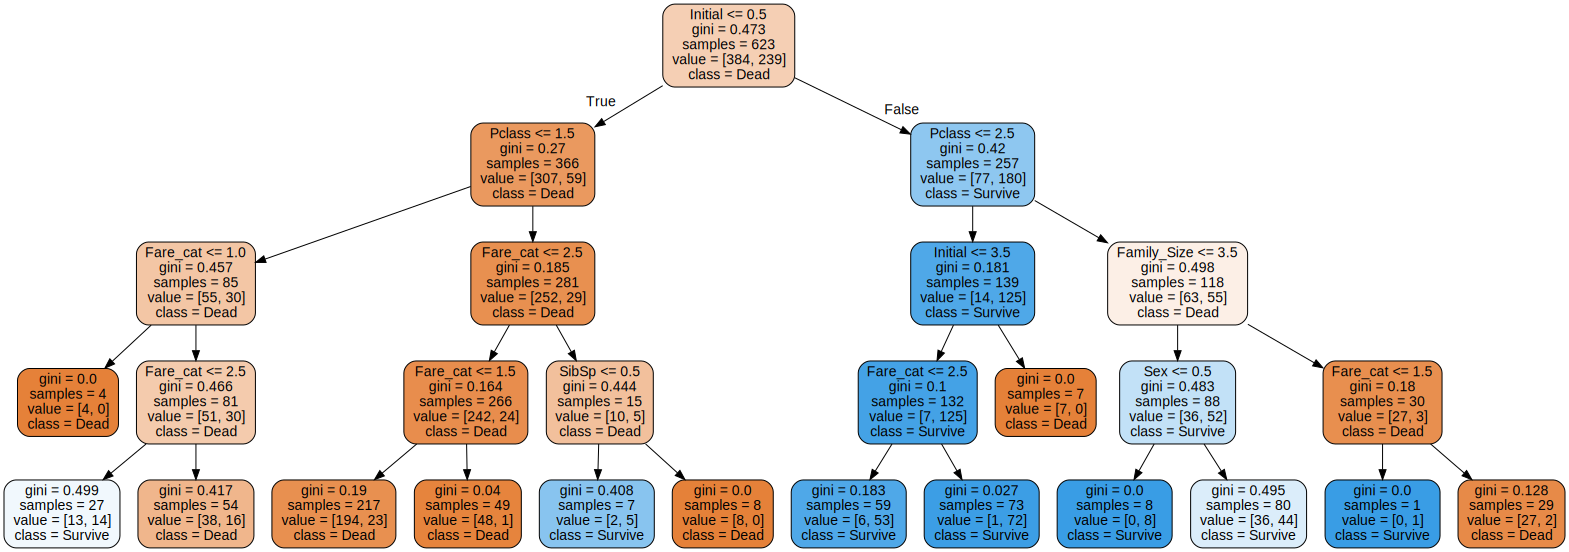

In [58]:
dot_data = export_graphviz(model4, 
                           feature_names=feature_names,
                           class_names=class_names, 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

In [59]:
model5 = RandomForestClassifier()
model5.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the Random Forest is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the Random Forest is 0.8134328358208955


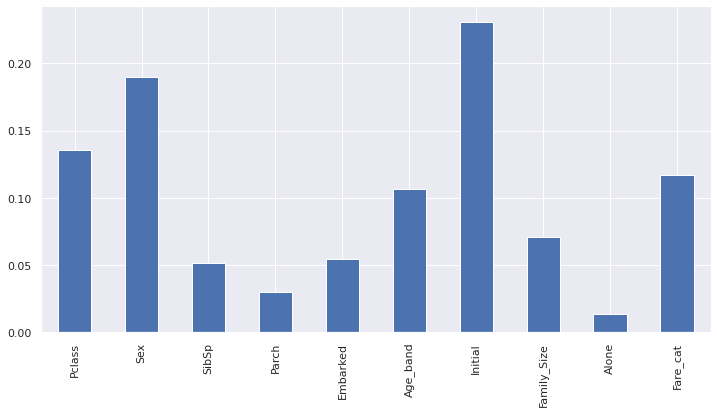

In [60]:
forest_importance = pd.Series(model5.feature_importances_, index=feature_names)

fig, ax = plt.subplots()
forest_importance.plot.bar(ax=ax)
fig.set_size_inches(12,6)
plt.show()

In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [62]:
kfold = KFold(n_splits=10)
xyz = []
accuracy = []
std = []
classifiers = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest']
models = [KNeighborsClassifier(n_neighbors=7), LogisticRegression(),
          DecisionTreeClassifier(), RandomForestClassifier(n_estimators=300)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring= 'accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean' : xyz, 'Std' : std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
KNN,0.814869,0.033036
Logistic Regression,0.794594,0.023735
Decision Tree,0.822684,0.021074
Random Forest,0.820462,0.029466


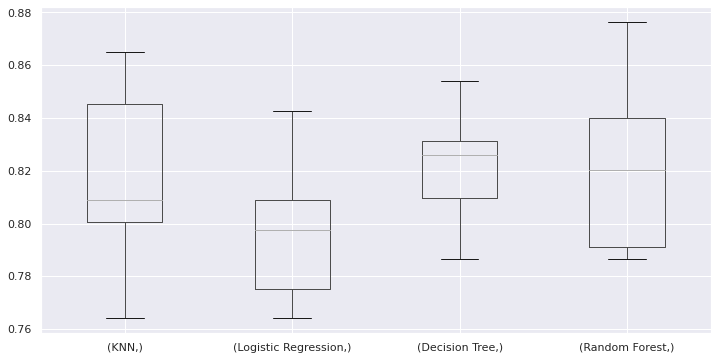

In [63]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()
plt.show()

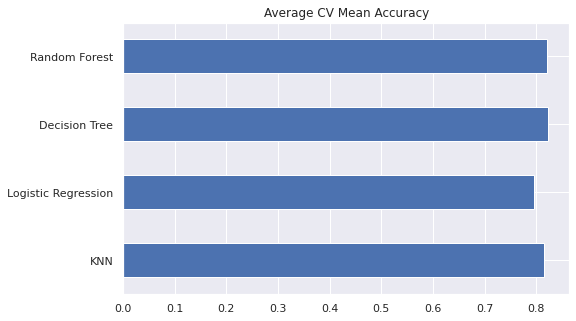

In [64]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.5)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

![Confusion Matrix](https://miro.medium.com/max/1750/1*85t6zbUiQA0fotnhDaJLaA.png)

![Precision](https://wikimedia.org/api/rest_v1/media/math/render/svg/d37e557b5bfc8de22afa8aad1c187a357ac81bdb)

![Accuracy](https://wikimedia.org/api/rest_v1/media/math/render/svg/e2e427ec6dcf2d7882c3bbdc659a8204cba59dcc)

![F1-score](https://wikimedia.org/api/rest_v1/media/math/render/svg/dd577aee2dd35c5b0e349327528a5ac606c7bbbf)

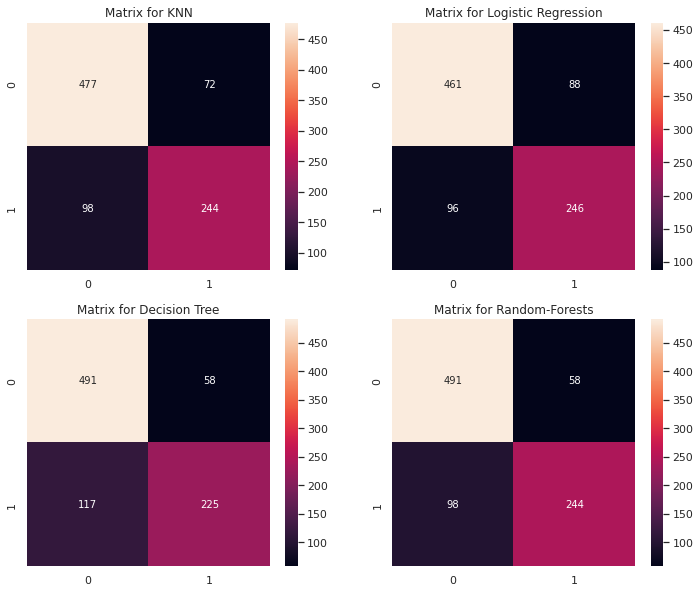

In [65]:
f,ax=plt.subplots(2,2,figsize=(12,10))

y_pred1 = cross_val_predict(KNeighborsClassifier(n_neighbors=7),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred1),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for KNN')
y_pred2 = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred2),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Logistic Regression')
y_pred3 = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred3),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Decision Tree')
y_pred4 = cross_val_predict(RandomForestClassifier(n_estimators=300),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred4),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Random-Forests')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [66]:
print('KNN Accuracy: ', metrics.accuracy_score(Y, y_pred1))
print('KNN Precision: ',metrics.precision_score(Y, y_pred1))
print('KNN Recall: ',metrics.recall_score(Y, y_pred1))
print('KNN F1: ',metrics.f1_score(Y, y_pred1))

KNN Accuracy:  0.8092031425364759
KNN Precision:  0.7721518987341772
KNN Recall:  0.7134502923976608
KNN F1:  0.7416413373860182


In [67]:
print('Logistic Regression Accuracy: ', metrics.accuracy_score(Y, y_pred2))
print('Logistic Regression Precision: ',metrics.precision_score(Y, y_pred2))
print('Logistic Regression Recall: ',metrics.recall_score(Y, y_pred2))
print('Logistic Regression F1: ',metrics.f1_score(Y, y_pred2))

Logistic Regression Accuracy:  0.7934904601571269
Logistic Regression Precision:  0.7365269461077845
Logistic Regression Recall:  0.7192982456140351
Logistic Regression F1:  0.7278106508875739


In [68]:
print('Decision Tree Accuracy: ', metrics.accuracy_score(Y, y_pred3))
print('Decision Tree Precision: ',metrics.precision_score(Y, y_pred3))
print('Decision Tree Recall: ',metrics.recall_score(Y, y_pred3))
print('Decision Tree F1: ',metrics.f1_score(Y, y_pred3))

Decision Tree Accuracy:  0.8035914702581369
Decision Tree Precision:  0.7950530035335689
Decision Tree Recall:  0.6578947368421053
Decision Tree F1:  0.7200000000000001


In [69]:
print('Random Forest Accuracy: ', metrics.accuracy_score(Y, y_pred4))
print('Random Forest Precision: ',metrics.precision_score(Y, y_pred4))
print('Random Forest Recall: ',metrics.recall_score(Y, y_pred4))
print('Random Forest F1: ',metrics.f1_score(Y, y_pred4))

Random Forest Accuracy:  0.8249158249158249
Random Forest Precision:  0.8079470198675497
Random Forest Recall:  0.7134502923976608
Random Forest F1:  0.7577639751552795
